# Case6 : One dimensional density associated with simple coalescent process

In this notebook, we estimate density associated with simple coalescent process on one-dimensional tree space by log-concave MLE. 

In [1]:
# importing packages
import lcdtreespace as lcd
import pandas as pd
import numpy as np
from importlib.resources import files
import os
import matplotlib.pyplot as plt

## sample data

We estimate following density on one-dimensional tree space:
$$f(x) =
\begin{cases}
    -\frac{1}{6}\exp(-x-1) + \frac{1}{2}\exp(-x + 1 - 2\max(0,1-x)) & \text{if } x \text{ is in the orthant 1} \\
    \frac{1}{3}\exp(-x-1) & \text{otherwise}..
\end{cases}$$
where $x$ in the right equation corresponds to the coordinate of a point $x$. This density is the distribution of a gene tree generated by a simple coalescent process of $3$-tree (The species tree has internal edge of length 1).

Package lcdtreespace has sample data drawn from this density at ```files("lcdtreespace").joinpath("data", "case6")```. 

The file "testcase_{$n$}\_{$i$}\_X.npy" contain sample coordinates with sample size $n$. "testcase_{$n$}_{$i$}_ort.npy" contains the orthants that each point belongs to.

Here, we compute the log-concave MLE from "testcase_200_0" files.

In [2]:
# list of sample data available
np.sort(os.listdir(files("lcdtreespace").joinpath("data", "case6")))

array(['testcase_1000_0_X.npy', 'testcase_1000_0_ort.npy',
       'testcase_1000_1_X.npy', 'testcase_1000_1_ort.npy',
       'testcase_1000_2_X.npy', 'testcase_1000_2_ort.npy',
       'testcase_1000_3_X.npy', 'testcase_1000_3_ort.npy',
       'testcase_1000_4_X.npy', 'testcase_1000_4_ort.npy',
       'testcase_1000_5_X.npy', 'testcase_1000_5_ort.npy',
       'testcase_1000_6_X.npy', 'testcase_1000_6_ort.npy',
       'testcase_1000_7_X.npy', 'testcase_1000_7_ort.npy',
       'testcase_1000_8_X.npy', 'testcase_1000_8_ort.npy',
       'testcase_1000_9_X.npy', 'testcase_1000_9_ort.npy',
       'testcase_100_0_X.npy', 'testcase_100_0_ort.npy',
       'testcase_100_1_X.npy', 'testcase_100_1_ort.npy',
       'testcase_100_2_X.npy', 'testcase_100_2_ort.npy',
       'testcase_100_3_X.npy', 'testcase_100_3_ort.npy',
       'testcase_100_4_X.npy', 'testcase_100_4_ort.npy',
       'testcase_100_5_X.npy', 'testcase_100_5_ort.npy',
       'testcase_100_6_X.npy', 'testcase_100_6_ort.npy',
       'tes

In [3]:
# load data
x = np.load(files("lcdtreespace").joinpath("data", "case6", "testcase_200_0_x.npy"))
ort = np.load(files("lcdtreespace").joinpath("data", "case6", "testcase_200_0_ort.npy"))
x, ort
# x contains coordinates, while ort contains the orthant each point belongs to

(array([0.14712608, 0.15221612, 0.15388442, 0.15406326, 0.22340238,
        0.27969304, 0.28490724, 0.30302409, 0.35015445, 0.38217977,
        0.40030127, 0.42270768, 0.48737446, 0.49649344, 0.498318  ,
        0.50027507, 0.56012585, 0.57439471, 0.58938918, 0.59696821,
        0.59891469, 0.61806072, 0.65096356, 0.66235735, 0.67460024,
        0.71850263, 0.73589389, 0.75370246, 0.77652709, 0.7901298 ,
        0.82279706, 0.83343556, 0.83426379, 0.85981804, 0.87809466,
        0.88038435, 0.88267714, 0.89582495, 0.9010465 , 0.92584401,
        0.9336543 , 0.94117468, 0.9472146 , 0.94964029, 0.95306023,
        0.95931244, 0.98347688, 0.99708321, 1.00120093, 1.00234262,
        1.03508457, 1.05435491, 1.06319688, 1.09155654, 1.13788694,
        1.14046784, 1.15608466, 1.18107816, 1.1935881 , 1.20175179,
        1.20772199, 1.20968401, 1.22062268, 1.22269739, 1.24651568,
        1.24698832, 1.25351677, 1.26365933, 1.30339679, 1.30408343,
        1.31786993, 1.36525413, 1.38729469, 1.38

## Computation of log-concave MLE

The computation of one dimensional log-concave MLE can be done by ```lcd.lcmle_1dim``` function. 

In [4]:
# optimization with BFGS is fast but unstable, thus we conduct 10 runs and adopt the best result
opt_y = lcd.lcmle_1dim(x=x,ort = ort,n_ort = 3, print_objective=True,bend=True,runs=10)

run 0: 3.048385731242985
run 1: 3.051744466892294
run 2: 3.0901546398989086
run 3: 3.051564509316761
run 4: 3.0503488471665516
run 5: 3.0467498449851864
run 6: 3.048352099306149
run 7: 3.0616599284296857
run 8: 3.0466862811742628
run 9: 3.049823038130475


In [5]:
# density object
lcmle = lcd.logconcave_density_estimate_1dim(opt_y, x, ort, 3, bend=True) # log-concave MLE
true_density = lcd.coalescent_1dim(T=1) # true density

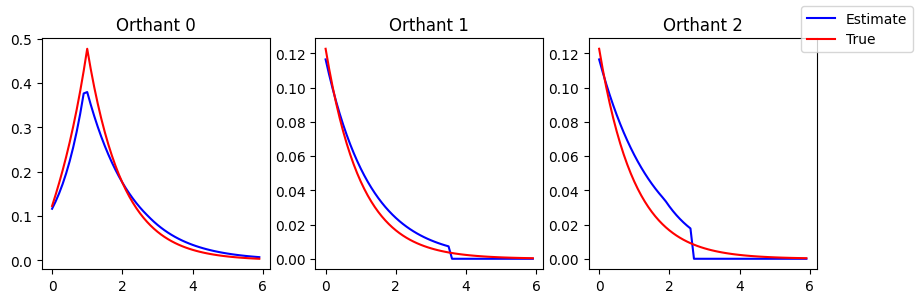

In [7]:
# plot of estimated density and true density
fig, axes = plt.subplots(1,3,figsize=(10,3))
xx = np.arange(0,6,0.1)
axes[0].plot(xx, np.vectorize(lcmle.pdf)(xx,0), c = "blue")
axes[0].plot(xx, np.vectorize(true_density.pdf)(xx,0), c = "red")
axes[0].set_title("Orthant 0")
axes[1].plot(xx, np.vectorize(lcmle.pdf)(xx,1), c = "blue")
axes[1].plot(xx, np.vectorize(true_density.pdf)(xx,1), c = "red")
axes[1].set_title("Orthant 1")
axes[2].plot(xx, np.vectorize(lcmle.pdf)(xx,2), c = "blue", label = "Estimate")
axes[2].plot(xx, np.vectorize(true_density.pdf)(xx,2), c = "red", label = "True")
axes[2].set_title("Orthant 2")
fig.legend()

## Kernel density estimator
To compare the result, we also compute the kernel density estimator from the same sample.

In [8]:
kde = lcd.kernel_density_estimate_1dim(x, ort, 3)

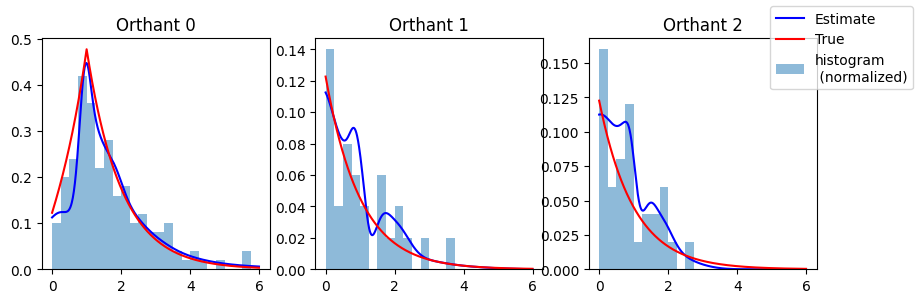

In [9]:
# plot of kernel density estimate and true_density
# Kernel density estimator
bin_edges = [k for k in np.arange(0,6.1,1/4)]
fig, axes = plt.subplots(1,3,figsize=(10,3))
xx = np.arange(0,6,0.01)
axes[0].plot(xx, np.vectorize(kde.pdf)(xx,0), c = "blue")
axes[0].plot(xx, np.vectorize(true_density.pdf)(xx,0), c = "red")
axes[0].hist(x[ort==0], bins = bin_edges, weights = [ 4/len(x)  for  _ in range(len(x[ort==0])) ] , alpha=0.5)
axes[0].set_title("Orthant 0")
axes[1].plot(xx, np.vectorize(kde.pdf)(xx,1), c = "blue")
axes[1].plot(xx, np.vectorize(true_density.pdf)(xx,1), c = "red")
axes[1].hist(x[ort==1], bins = bin_edges, weights = [ 4/len(x)  for  _ in range(len(x[ort==1])) ] , alpha=0.5)
axes[1].set_title("Orthant 1")
axes[2].plot(xx, np.vectorize(kde.pdf)(xx,2), c = "blue", label = "Estimate")
axes[2].plot(xx, np.vectorize(true_density.pdf)(xx,2), c = "red", label = "True")
axes[2].hist(x[ort==2], bins = bin_edges, weights = [ 4/len(x)  for  _ in range(len(x[ort==2])) ] , alpha=0.5, label="histogram\n (normalized)")
axes[2].set_title("Orthant 2")
fig.legend()

## Computation of Integrated Squared Error (ISE)

In [10]:
# calculation of integrted squared error
lcmle_ise, lcmle_err = lcd.ise_1dim(true_density, lcmle, epsabs = 1e-5)
kde_ise, kde_err = lcd.ise_1dim(true_density, kde, epsabs = 1e-5)

In [11]:
lcmle_ise, kde_ise

(0.004996466233473029, 0.010934521505402169)